# Reconstruction quality as a function of n_nodes

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn
import time

### Experiment 1: How long should be the training set?

If testing on the same signal on which were trained, how does the training signal length affect prediction quality?

Reservoir of 100 nodes, `ws` type.
........................................

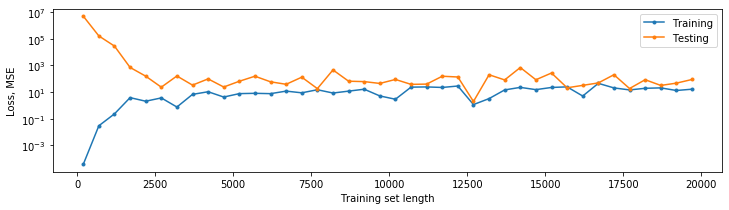

In [33]:
model = esn.Reservoir(100)
print(model)
data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_lengths = np.arange(200, 20000, 500, dtype=int)
test_length = 200

loss = np.zeros((len(training_signal_lengths),2)) # Training and testing losses

for i in range(len(training_signal_lengths)):
    seed = np.random.uniform()
    x,y = data.generate(points_to_skip + training_signal_lengths[i],
                        sampling_step=0.02, seed=seed) # Larger set for training
    model.fit(x, y, skip=points_to_skip)

    # Training data loss    
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,0] = esn.Data.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    # Now generate new data, predict on it, calculate testing loss
    seed = np.random.uniform()
    x,y = data.generate(2000, sampling_step=0.02, seed=seed)
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,1] = esn.Data.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    print('.', end='')

    
plt.figure(figsize=(12,3));
plt.plot(training_signal_lengths, loss, '.-');
plt.yscale('log')
plt.xlabel('Training set length');
plt.ylabel('Loss, MSE');
plt.legend(labels=['Training', 'Testing']);

### Experiment 2: The effect of reservoir size

....................
Elapsed: 40.29 s


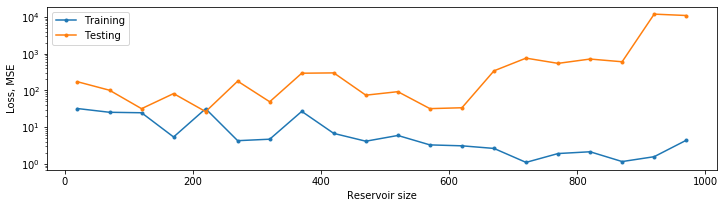

In [49]:
data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_length = 20000
test_length = 200

n_units_array = np.arange(20, 1000, 50, dtype=int)

loss = np.zeros((len(n_units_array),2)) # Training and testing losses

t = time.time()
for i in range(len(n_units_array)):
    model = esn.Reservoir(n_units_array[i])

    seed = np.random.uniform()
    x,y = data.generate(points_to_skip + training_signal_length, sampling_step=0.02, seed=seed)
    model.fit(x, y, skip=points_to_skip)

    # Training data loss    
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,0] = esn.Data.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    # Now generate new data, predict on it, calculate testing loss
    seed = np.random.uniform()
    x,y = data.generate(2000, sampling_step=0.02, seed=seed)
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,1] = esn.Data.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    print('.', end='')

print(f'\nElapsed: {time.time() - t:4.2f} s')

    
plt.figure(figsize=(12,3));
plt.plot(n_units_array, loss, '.-');
plt.yscale('log')
plt.xlabel('Reservoir size');
plt.ylabel('Loss, MSE');
plt.legend(labels=['Training', 'Testing']);